# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Section 1: Preparing the data

In [2]:
#Load the dataset as training and testing, then print out the shapes of the data matrices

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

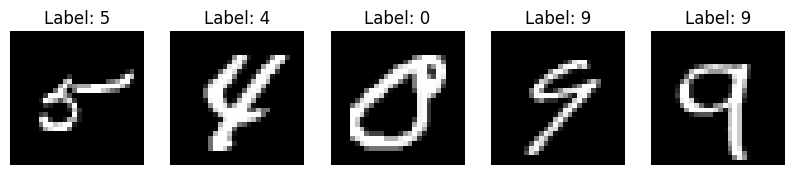

In [3]:
def display_random_images(train_X, train_y, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        # Randomly select an index
        random_idx = np.random.randint(0, train_X.shape[0])
        
        # Get the image and corresponding label
        image = train_X[random_idx]
        label = train_y[random_idx]
        
        # Display the image in grayscale
        plt.subplot(1, num_images, i+1)  # 1 row, 5 columns
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    
    # Show all the images at once
    plt.show()

display_random_images(train_X, train_y, num_images=5)
#TODO Code to display 5 random handritten images from train_X and corresponting labels from train_y

**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

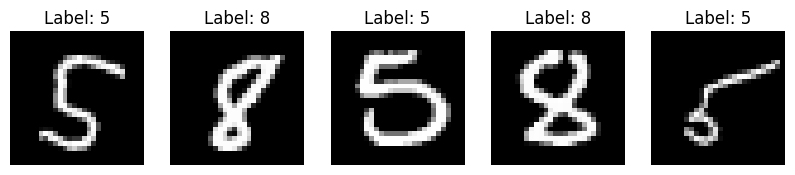

In [4]:
def extract_digits(X, y, d1, d2):

    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"
    
    #TODO
    indices = np.where((y == d1) | (y == d2))[0]
    
    # Extract the samples and labels using the indices
    X_extracted = X[indices]
    y_extracted = y[indices]

    return (X_extracted, y_extracted)


d1, d2 = 5, 8
X_extracted, y_extracted = extract_digits(train_X, train_y, d1, d2)
display_random_images(X_extracted, y_extracted, num_images=5)

**Q3.** Both the training dataset train_X and test_y is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [5]:
np.set_printoptions(threshold=np.inf)
def vectorize_images(X):

    X_reshaped = X.reshape(X.shape[0], -1) # Reshaping (N, 28, 28) to (N, 784)
    X_transposed = X_reshaped.T
    # X_vectorized = X_reshaped.T
    column_max = np.max(X_transposed,axis=0)
    X_vectorized = X_transposed/column_max
    # print(column_max.shape)
    # print(column_max)
    
    #TODO

    return(X_vectorized)

# X_vectorized = vectorize_images(train_X)
# print(X_vectorized.shape) 
# print(X_vectorized[500])

**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for both the training set (train_X, train_y) and testing set (test_X, test_y) separately.
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5, test_X_1_5, test_y_1_5
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in the arrays named train_class_1_5, test_class_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [6]:
d1, d2 = 1,5
Train_X_1_5, Train_y_1_5 = extract_digits(train_X, train_y, d1, d2)
# display_random_images(Train_X_1_5, Train_y_1_5, num_images=5)

d1, d2 = 1,5
Test_X_1_5, Test_y_1_5 = extract_digits(test_X, test_y, d1, d2)
# display_random_images(Test_X_1_5, Test_y_1_5, num_images=5)

#################

train_X_1_5 = vectorize_images(Train_X_1_5)
# print(Train_y_1_5)
test_X_1_5 = vectorize_images(Test_X_1_5)
# print(Test_y_1_5)
print(test_X_1_5.shape)
# print(train_X_1_5[500])
train_y_1_5 = Train_y_1_5
test_y_1_5 = Test_y_1_5
train_class_1_5 =  np.where(train_y_1_5 == 1, 0, 1)
# print(train_class_1_5.shape)
test_class_1_5 = np.where(test_y_1_5 == 1, 0, 1)
print(test_class_1_5.shape)

(784, 2027)
(2027,)


## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that the input to the derivative functions is $y$ not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless fince the MLP will just output Nan (not a number) for evry input at the end.

In [7]:
def sigmoid(Z):

    #TODO
    Z = np.clip(Z, -500, 500)
    sigma =  1 / (1 + np.exp(-Z))
    
    return(sigma)

def deriv_sigmoid(Y):

    #TODO
    sigma_prime =  sigmoid(Y) * (1 - sigmoid(Y))
    
    return(sigma_prime)

def ReLu(Z):

    #TODO
    relu =  np.maximum(0, Z)
    
    return(relu)

def deriv_ReLu(Y):

    #TODO
    relu_prime =  np.where(Y > 0, 1, 0)
    
    return(relu_prime)


In [91]:
# z = np.array([-2, -1, 0, 1, 2])  # Example input

# # Sigmoid and its derivative
# sigmoid_vals = sigmoid(z)
# sigmoid_derivative_vals = deriv_sigmoid(sigmoid_vals)

# # ReLU and its derivative
# relu_vals = ReLu(z)
# relu_derivative_vals = deriv_ReLu(z)

# print("Sigmoid:", sigmoid_vals)
# print("Sigmoid Derivative:", sigmoid_derivative_vals)
# print("ReLU:", relu_vals)
# print("ReLU Derivative:", relu_derivative_vals)

**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [8]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3

In [9]:
# print(2*(np.random.rand(5, 6 + 1)-0.5))
nnet = NNet()
# print("Weights for the first hidden layer:")
print(len(nnet.W))
# print(nnet.W[3])

4


**Answers** (to write answers edit this cell)

(i) What does the Y, Z, W variables refer to and their purpose?

<font color='blue'>**Y**: Stores the activations for each layer after applying the activation function.</font>

<font color='blue'>**Z**: Stores the pre-activation values (linear combinations of inputs and weights).</font>

<font color='blue'>**W**: Stores the weights (including biases) between the layers.</font>

(ii) Line1: Explanation

<font color='blue'>This line initializes a matrix for the activations $Y$ of each layer with dimensions (number of neurons in the current layer, batch_size). It is initialized to zeros and will later hold the activation values after applying the activation function.</font>

(iii) Line2: Explanation

<font color='blue'>This line initializes a matrix for the pre-activation values $Z$ of each layer, with the same dimensions (number of neurons in the current layer, batch_size). These pre-activations will hold the linear combinations of inputs before applying the activation function.</font>

(iv) Line3: Explanation

<font color='blue'>This line initializes the weight matrix $W$ for each layer. The weights are randomly generated using np.random.rand and scaled to be between -1 and 1 by subtracting 0.5 and multiplying by 2. The dimensions of the weight matrix are (number of neurons in the current layer, number of neurons in the previous layer + 1) to account for the bias term (hence +1). These weights will be used to compute the linear combination of inputs and biases for each neuron in the layer.</font>  

**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term. However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> During definition above the weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [10]:
def feedforward(model, X):

    #TODO
    # Reset stored values in model
    # print(len(model.W))
    model.Y = []  # Store the activations Y
    model.Z = []  # Store the pre-activation Z

    # Add input layer to Y
    # X = X.T  # Transpose to match (input_size, batch_size)
    model.Y.append(X)  # The first layer input (X)

    # Feedforward through layers
    
    for i in range(len(model.W)):
        # Add a row of ones for the bias term
        Y_prev = model.Y[-1]  # Get activations from the previous layer
        Y_prev_with_bias = np.vstack([np.ones((1, Y_prev.shape[1])), Y_prev])

        # Compute Z = W*Y (weighted sum with bias)
        Z_curr = np.dot(model.W[i], Y_prev_with_bias)
        model.Z.append(Z_curr)  # Store pre-activation values Z

        if i == len(model.W) - 1:
            # Final layer: use Sigmoid activation
            Y_curr = sigmoid(Z_curr)
        else:
            # Hidden layers: use ReLU activation
            Y_curr = ReLu(Z_curr)
        
        model.Y.append(Y_curr)  # Store activations Y
        
    return(model)

In [34]:
# nnet = NNet()
# model = feedforward(nnet, train_class_1_5)
# model = NNet(input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50])
# model = feedforward(model, train_class_1_5)

# train_class_1_5 = np.random.rand(1000, 784)  # 1000 images of size 28x28 (flattened to 784)

# Perform feedforward
# print(train_class_1_5.shape)
# model = feedforward(model, train_class_1_5)

# # Check outputs (Z and Y values for each layer)
# for i, (Z, Y) in enumerate(zip(model.Z, model.Y[1:]), start=1):
#     print(f"Layer {i}:")
#     print(f"Z (pre-activation) shape: {Z.shape}")
#     print(f"Y (activation) shape: {Y.shape}\n")

**Answer** (to write answers edit this cell)

Explain what the bias term is and how adding a row of one's help with the bias terms.

<font color='blue'>To incorporate the bias term during matrix multiplication, we typically augment the input matrix by adding a row of ones. This row will multiply with the bias component of the weight matrix, allowing the bias to be included in the calculation without needing a separate operation.</font> 

<font color='blue'>Adding a row of ones ensures that the bias term is always added during each layer’s transformation without altering the dimension of the input vectors. It simplifies the implementation by making sure that the bias is accounted for during matrix multiplication with the weights.</font> 

In [35]:
# print(np.random.randint(0, 2, (10, 1)))

**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [11]:
def backpropagation(model, X, Y, eta = 0.01):

    # Initialize gradients for weights
    grad_W = [np.zeros_like(W) for W in model.W]
    
    # Step 1: Compute the error at the output layer (delta^L)
    Y_pred = model.Y[-1]  # Output of the final layer (after Sigmoid)
    delta_L = (Y_pred - Y.T) * deriv_sigmoid(model.Z[-1])  # Gradient at the output layer (sigmoid's derivative)
    
    # Store the gradient for the last layer (output layer)
    Y_prev = model.Y[-2]  # Activations from the previous (hidden) layer
    Y_prev_with_bias = np.vstack([np.ones((1, Y_prev.shape[1])), Y_prev])  # Add bias to activations
    grad_W[-1] = np.dot(delta_L, Y_prev_with_bias.T)  # Gradient for the final layer's weights
    
    # Step 2: Backpropagate through the hidden layers
    delta = delta_L  # Initialize delta for the loop
    for l in range(len(model.W) - 2, -1, -1):  # Start from second-last layer to the first
        W_no_bias = model.W[l + 1][:, 1:]  # Remove bias from next layer's weights for backprop
        delta = np.dot(W_no_bias.T, delta) * deriv_ReLu(model.Z[l])  # Gradient at hidden layer (ReLU's derivative)

        # Store the gradient for the current layer's weights
        Y_prev = model.Y[l]  # Activations from the previous layer (or input if first hidden layer)
        Y_prev_with_bias = np.vstack([np.ones((1, Y_prev.shape[1])), Y_prev])  # Add bias to activations
        grad_W[l] = np.dot(delta, Y_prev_with_bias.T)  # Gradient for the current layer's weights
    
    # Step 3: Update weights using gradient descent
    for l in range(len(model.W)):
        model.W[l] -= eta * grad_W[l]  # Update weights with gradient and learning rate
    
    return model

In [15]:
# model = NNet(input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50])
# train_class_1_5 = np.random.rand(1000, 784)  # 1000 images of size 28x28 (flattened to 784)
# train_labels_1_5 = np.random.randint(0, 2, (1000, 1))  # Random binary labels
# # print(model.W[3])
# # Perform backpropagation
# model = backpropagation(model, train_class_1_5, train_labels_1_5, eta=0.01)



**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



In [12]:
def train_NNet(X, Y, model , epochs = 20, batch_size = 1000, eta = 0.01):

    #TODO
    n_samples = X.shape[1] 
    cost_C = [] 
    weight_changes = [] 
    hidden_layers=model.hidden_layers
    for epoch in range(epochs):
        
        # Shuffling the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[:, indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            Y_batch = Y_shuffled[i:i+batch_size] 
            
            # feddforward
            model = feedforward(model, X_batch)
            
            cost = 0.5 * np.linalg.norm(model.Y[-1] - Y_batch) ** 2
            cost_C.append(cost)
            
            # Backpropagation
            model = backpropagation(model, X_batch, Y_batch, eta)
            
            weight_norm = np.linalg.norm([np.linalg.norm(w) for w in model.W])
            weight_changes.append(weight_norm)
        
        print(f'Epoch {epoch+1}/{epochs}, Cost: {cost_C[-1]}')

    #Ploting
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(cost_C, label='Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over time',pad= 20)
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(weight_changes, label='Weight Changes')
    plt.xlabel('Iterations')
    plt.ylabel('L2 norm of weight changes')
    plt.title('L2 Norm of Weight Changes over time',pad=20)
    plt.legend()
    
    plt.suptitle(f'For the parameters : Epochs={epoch} , Batch Size={batch_size} , eta={eta} , hidden_layers={hidden_layers}', fontsize=12,y=1.08)
    
    plt.show()


    return(model)

Epoch 1/50, Cost: 0.5
Epoch 2/50, Cost: 0.5
Epoch 3/50, Cost: 1.4999999999999998
Epoch 4/50, Cost: 1.0000000000000002
Epoch 5/50, Cost: 1.0000000000000002
Epoch 6/50, Cost: 1.0000000000000002
Epoch 7/50, Cost: 1.0000000000000002
Epoch 8/50, Cost: 1.0000000000000002
Epoch 9/50, Cost: 1.0000000000000002
Epoch 10/50, Cost: 0.0
Epoch 11/50, Cost: 0.5
Epoch 12/50, Cost: 1.0000000000000002
Epoch 13/50, Cost: 1.4999999999999998
Epoch 14/50, Cost: 0.5
Epoch 15/50, Cost: 1.0000000000000002
Epoch 16/50, Cost: 0.5
Epoch 17/50, Cost: 1.4999999999999998
Epoch 18/50, Cost: 1.4999999999999998
Epoch 19/50, Cost: 0.5
Epoch 20/50, Cost: 1.4999999999999998
Epoch 21/50, Cost: 0.0
Epoch 22/50, Cost: 0.5
Epoch 23/50, Cost: 0.5
Epoch 24/50, Cost: 1.0000000000000002
Epoch 25/50, Cost: 0.0
Epoch 26/50, Cost: 0.0
Epoch 27/50, Cost: 1.4999999999999998
Epoch 28/50, Cost: 1.0000000000000002
Epoch 29/50, Cost: 0.5
Epoch 30/50, Cost: 1.0000000000000002
Epoch 31/50, Cost: 0.5
Epoch 32/50, Cost: 1.0000000000000002
Epo

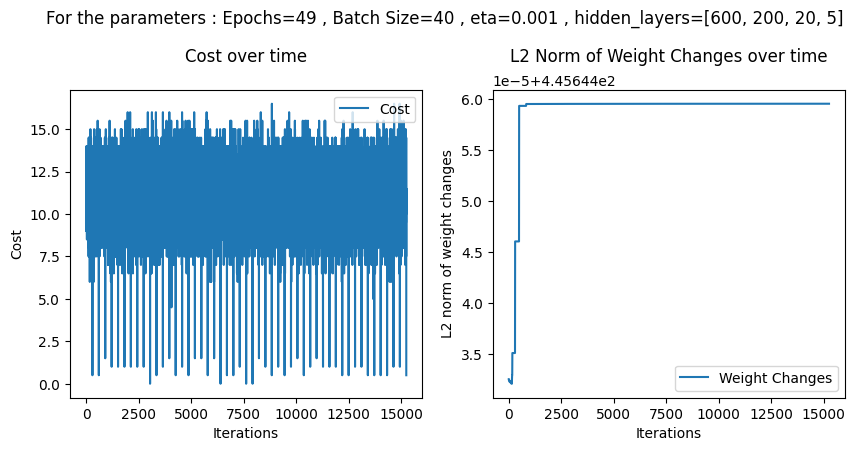

In [150]:
batch_size = 40
hidden_layers = [600,200,20,5]
epochs = 50
eta = 0.001

model = NNet(input_size=784, output_size=1, batch_size=batch_size, hidden_layers=hidden_layers)
# # ss = deriv_sigmoid(model.Z[0])
# # print(ss.shape)
trained_model = train_NNet(train_X_1_5, train_class_1_5, model=model, epochs=epochs, batch_size=batch_size, eta=eta)

## Section 3: Evaluation using test data

The following function will evaluate then return an accuracy score and the predicted labels for your model. Do not change anything here.

In [142]:
def test_model(test_data, test_labels, model, d1, d2):
    
    L = len(model.hidden_layers) + 1
    
    Y = test_data
    for i in range(L):
        Z = np.matmul(model.W[i], np.append(Y, np.array([np.ones(Y.shape[1])]), axis = 0))
        if i < L - 1:
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)
    
    Y = Y[0]
    Y = np.where(Y >= 0.5, 1, 0)
    Y_predicted = np.where(Y == 0, d1, d2)

    acc = accuracy_score(test_labels, Y_predicted)

    return(acc, Y_predicted)

    

In [140]:
# # batch_sizes = [1000,500,100,50]
# # etas = [0.001,0.01,0.05,0.1]
# hidden_layers = [[500, 100] , [500,250,50] ,[600,200,20,5]]
# epochs =[20,50,75]


# batch_sizes = [40]
# etas = [0.001]
# # hidden_layers_list = [[600,200,20,5]]
# # epochs =[20]


# best_accuracy = 0
# best_model = None
# best_hyperparams = {}

# for batch_size in batch_sizes:
#     for eta in etas:
#         for hidden_layers in hidden_layers:
#             for epoch in epochs:
#                 model = NNet(input_size=784, output_size=1, batch_size=batch_size, hidden_layers=hidden_layers)
#                 trained_model = train_NNet(train_X_1_5, train_class_1_5, model=model, epochs=epoch, batch_size=batch_size, eta=eta)
#                 accuracy,Y_predict = test_model(test_X_1_5,test_y_1_5,trained_model,1,5)

#                 if accuracy > best_accuracy:
#                     best_accuracy = accuracy
#                     best_model = trained_model
#                     best_hyperparams = {'batch_size': batch_size, 'eta': eta, 'hidden_layers': hidden_layers,'epochs':epoch}
                    
#                 print(f"Batch size: {batch_size}, Learning rate: {eta}, Hidden Layers: {hidden_layers}, epochs:{epoch} , Accuracy: {accuracy:.4f}")
#                 print(f"Best Hyperparameters: {best_hyperparams}, Best Accuracy: {best_accuracy:.4f}")

# print(f"Best Hyperparameters: {best_hyperparams}, Best Accuracy: {best_accuracy:.4f}")


**Q10.** Use this test_model function to evaluate your model with the $1$ and $5$ digits. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. <font color='blue'>Document the hyperparameter values that gives the best testing accuracy and that best accuracy. Plot a confusion matrix and comment on your observations with reasons. Also, look into the nature of the plots that result fom the training procedure, see how they vary with the hyperparameters and provide your ideas on the observations. Then do the same with a few other pairs of digits $d_1, d_2$. Especially, try $d_1 = 1, d_2 = 7$. Comment on your observations and explain possible reasons</font>.

In [151]:
Acc,Ypradict = test_model(test_X_1_5, test_y_1_5, trained_model, 1,5)
print(test_y_1_5.shape)
print(Acc,Ypradict.shape)

(2027,)
0.7789837197829305 (2027,)


Best Hyperparameters: 

batch_size: 40,

eta: 0.001, 

hidden_layers: [600,200,20,5]

epochs : 50

Best Accuracy: 0.7789

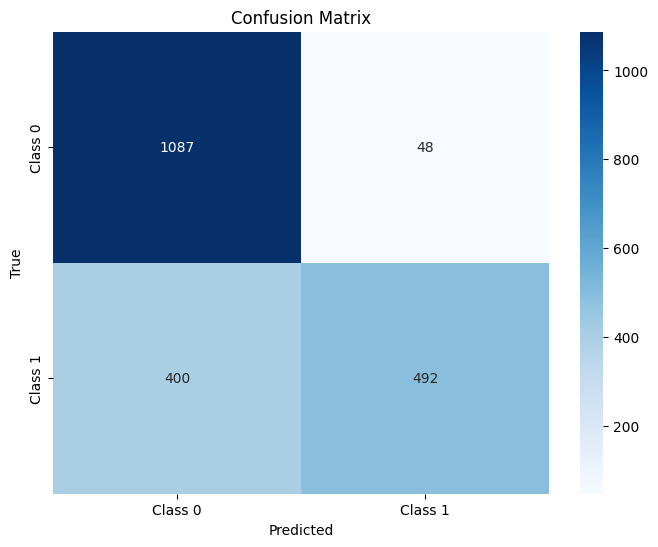

In [152]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plots a confusion matrix using Seaborn's heatmap.
    
    Args:
    - y_true: True class labels.
    - y_pred: Predicted class labels.
    - class_names: List of class names (strings) for the plot.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    
    # Label the axes
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    # Show the plot
    plt.show()

# Example usage with binary classification
# Assume y_true and y_pred are the true and predicted class labels
y_true = np.array([0, 1, 1, 0, 0, 0, 1])  # Replace with actual labels
y_pred = np.array([0, 1, 0, 0, 1, 0, 1])  # Replace with your model's predictions

# Plot confusion matrix
class_names = ['Class 0', 'Class 1']
plot_confusion_matrix(test_y_1_5, Ypradict, class_names)


<font color='blue'>Based on the confusion matrix, the majority of predictions are correctly placed in the "True Class 0, Predicted Class 0" and "True Class 1, Predicted Class 1" regions, indicating that the model is performing well. A small number of misclassifications are present in the "True Class 0, Predicted Class 1" and "True Class 1, Predicted Class 0" regions, but these are relatively minor compared to the correctly predicted cases.</font>

<font color='blue'>This suggests that the model has learned to distinguish between the two classes effectively. The low number of misclassifications indicates good accuracy, but further tuning of hyperparameters (e.g., learning rate, number of hidden layers) could improve performance and reduce these errors further</font>.

In [153]:
d1, d2 = 1,7
Test_X_1_7, Test_y_1_7 = extract_digits(test_X, test_y, d1, d2)

test_X_1_7 = vectorize_images(Test_X_1_7)
test_y_1_7 = Test_y_1_7

Acc,Ypradict_1_7 = test_model(test_X_1_7, test_y_1_7, trained_model, 1, 7)
# print(test_class_1_5)
print(Acc,Ypradict_1_7)
# test_class_1_7 = np.where(test_y_1_7 == 1, 0, 1)

0.5714285714285714 [1 7 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 7 1 7 1 1 1 1
 1 1 7 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 7 1 1 7 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 7 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1
 1 1 1 7 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1
 1 1 1 1 7 7 7 1 1 7 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 7 1 1 1 1 1
 1 1 1 7 1 1 1 1 1 7 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1
 1 7 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1
 1 7 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 7 1 7 1 1 1 7 1 1 1 1 1 1 1 1 1 1
 1 7 1 1 1 7 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 7 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1
 1 1 1

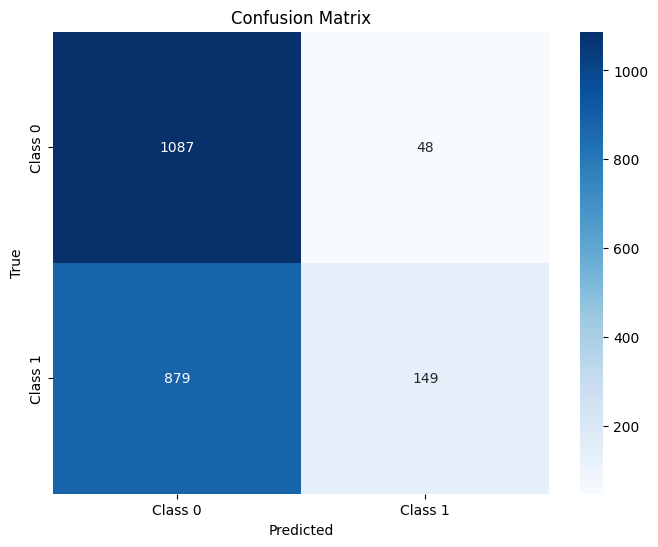

In [154]:
class_name = ['Class 0', 'Class 1']
plot_confusion_matrix(test_y_1_7, Ypradict_1_7, class_names)

<font color='blue'>The model struggled to achieve high accuracy when tested on the digits 1 and 7 due to their similar shapes in the handwritten images, making it challenging for the model to differentiate between the two classes accurately</font>.